# **Calculando a fronteira eficiente com o melhor índice sharpe com Python**
Para acessar o tutorial completo, e outros tutorias, acesse:

https://edu.ieee.org/br-ufcgras/tutoriais/

O tutorial completo explicando esse código se encontra no link abaixo:

https://drive.google.com/file/d/15sm18WnkNXQNSlj2TFkZMWmHYpKbH6np/view


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web
from datetime import datetime 
plt.style.use('fivethirtyeight')

Aqui vai um bônus para quem deseja acessar os dados financeiros do Yahoo Finance, é possível utilizar a biblioteca yfinance:

https://pypi.org/project/yfinance/

In [ ]:
pip install yfinance 

In [ ]:
import yfinance as yf
ticker = 'TSLA'
dados = yf.Ticker(ticker)
tickerDF = dados.history(period = '1d', start='2010-1-1', end='2020-10-31')
tickerDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.800000,5.000000,3.508000,4.778000,93831500,0,0.0
2010-06-30,5.158000,6.084000,4.660000,4.766000,85935500,0,0.0
2010-07-01,5.000000,5.184000,4.054000,4.392000,41094000,0,0.0
2010-07-02,4.600000,4.620000,3.742000,3.840000,25699000,0,0.0
2010-07-06,4.000000,4.000000,3.166000,3.222000,34334500,0,0.0
...,...,...,...,...,...,...,...
2020-10-26,411.630005,425.760010,410.000000,420.279999,28239200,0,0.0
2020-10-27,423.760010,430.500000,420.100006,424.679993,22686500,0,0.0
2020-10-28,416.480011,418.600006,406.000000,406.019989,25451400,0,0.0


Vamos começar então! Primeiro escolhemos as empresas que farão parte do nosso universo de ações, junto com o peso que cada uma vai assumir na carteira e com o tempo de análise:


In [ ]:
acoes = ['TSLA', 'AAPL', 'GOOG', 'AMZN', 'FB']

In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
inicio = '2016-01-01'
hoje = datetime.today().strftime('%Y-%m-%d')
hoje

'2020-11-24'

In [ ]:
df = pd.DataFrame() 

for acao in acoes:
  df[acao] = web.DataReader(acao, data_source='yahoo', start=inicio, end=fim)['Adj Close']
df

,TSLA,AAPL,GOOG,AMZN,FB
Date,,,,,
2016-01-04,44.681999,24.202784,741.840027,636.989990,102.220001
2016-01-05,44.686001,23.596279,742.580017,633.789978,102.730003
2016-01-06,43.807999,23.134508,743.619995,632.650024,102.970001
2016-01-07,43.130001,22.158121,726.390015,607.940002,97.919998
2016-01-08,42.200001,22.275295,714.469971,607.049988,97.330002
...,...,...,...,...,...
2020-10-26,420.279999,114.851852,1590.449951,3207.040039,277.109985
2020-10-27,424.679993,116.399178,1604.260010,3286.330078,283.290009
2020-10-28,406.019989,111.008476,1516.619995,3162.780029,267.670013


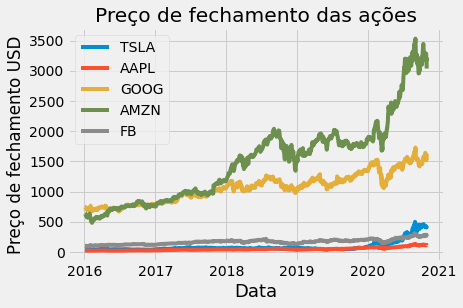

In [ ]:
df1 = df

for c in df1.columns.values:
  plt.plot(df1[c], label=c)
plt.title('Preço de fechamento das ações')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Preço de fechamento USD')
plt.legend(df1.columns.values, loc = 'upper left')
plt.show() 

In [ ]:
#retornos diários
retorno = df.pct_change()
retorno

,TSLA,AAPL,GOOG,AMZN,FB
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000090,-0.025059,0.000998,-0.005024,0.004989
2016-01-06,-0.019648,-0.019570,0.001400,-0.001799,0.002336
2016-01-07,-0.015477,-0.042205,-0.023170,-0.039058,-0.049043
2016-01-08,-0.021563,0.005288,-0.016410,-0.001464,-0.006025
...,...,...,...,...,...
2020-10-26,-0.000832,0.000087,-0.030804,0.000824,-0.026967
2020-10-27,0.010469,0.013472,0.008683,0.024724,0.022302
2020-10-28,-0.043939,-0.046312,-0.054630,-0.037595,-0.055138


In [ ]:
#Multiplica por 252 pra anualizar (252 dias úteis em um ano comercial)
matriz_cov_anual = retorno.cov() * 252
matriz_cov_anual

,TSLA,AAPL,GOOG,AMZN,FB
TSLA,0.331676,0.069629,0.057114,0.065195,0.062565
AAPL,0.069629,0.091559,0.052808,0.054720,0.057795
GOOG,0.057114,0.052808,0.070265,0.053707,0.060353
AMZN,0.065195,0.054720,0.053707,0.092197,0.061762
FB,0.062565,0.057795,0.060353,0.061762,0.108588


In [ ]:
variancia = np.dot(pesos.T, np.dot(matriz_cov_anual, pesos))
volatilidade = np.sqrt(variancia)
volatilidade

0.27463280253729294

In [ ]:
retorno_anual = np.sum(retorno.mean() * pesos * 252)
retorno_anual

0.3577332023337163

In [ ]:
print('Retorno esperado anual: ' + str(round(retorno_anual, 2)*100) + '%')
print('Risco: ' + str(round(volatilidade, 2)*100) + '%')
print('Variância: ' + str(round(variancia, 2)*100) + '%')

Retorno esperado anual: 36.0%
Risco: 27.0%
Variância: 8.0%


In [ ]:
pip install PyPortfolioOpt

In [ ]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
media = expected_returns.mean_historical_return(df)
cov = risk_models.sample_cov(df)

EF = EfficientFrontier(media, cov)
pesos = EF.max_sharpe()
#limpando os dados brutos removendo as ações que não contribuem para a otimização do portfólio(cheque a documentação!)
pesosEficientes = EF.clean_weights()
print(pesosEficientes)
EF.portfolio_performance(verbose = True)

OrderedDict([('TSLA', 0.1677), ('AAPL', 0.36292), ('GOOG', 0.0), ('AMZN', 0.46938), ('FB', 0.0)])
Expected annual return: 40.7%
Annual volatility: 28.1%
Sharpe Ratio: 1.37


(0.4066370848795948, 0.28121453231408305, 1.3748830179507485)

In [ ]:
print('Aumento no retorno anual: ', ((0.407/retorno_anual)-1)*100, '%')
print('Aumento da volatilidade anual: ', ((0.281/volatilidade)-1)*100, '%')

Aumento no retorno anual:  13.77193879262133 %
Aumento da volatilidade anual:  2.3184402605520793 %


In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

ultimo_preco = get_latest_prices(df)
pesos = pesosEficientes
da = DiscreteAllocation(pesos, ultimo_preco, total_portfolio_value = 10000)
alocacao, resto = da.lp_portfolio()
print('Quantidade de ações: ', alocacao)
print('Dinheiro restante: ${:.2f}'.format(resto)) 

Quantidade de ações:  {'TSLA': 2, 'AAPL': 29, 'AMZN': 2}
Dinheiro restante: $0.12
